<a href="https://colab.research.google.com/github/Faiz-Hibatullah/machine-learning-1103210172/blob/main/6.%20Week%206/Clusteringweek06_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Load Data

In [39]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import pdist

# membaca file CSV
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv"
data = pd.read_csv(url)

# Tampilkan beberapa baris dan info dataset
print("Informasi dataset:")
print(data.info())
print("\nHead dataset:")
print(data.head())

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-n

#2. Preprocessing Data

In [40]:
if data.columns[0].lower() in ['id', 'no']:
    data = data.drop(columns=[data.columns[0]])

# Ubah semua kolom menjadi numerik jika memungkinkan
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Hapus baris yang memiliki nilai hilang
data_cleaned = data.dropna().reset_index(drop=True)
print("Bentuk data setelah pembersihan:", data_cleaned.shape)

# --- 2. Standarisasi Data ---
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)
print("Bentuk data setelah standarisasi:", data_scaled.shape)

Bentuk data setelah pembersihan: (7195, 22)
Bentuk data setelah standarisasi: (7195, 22)


#3. Membuat Model Clustering


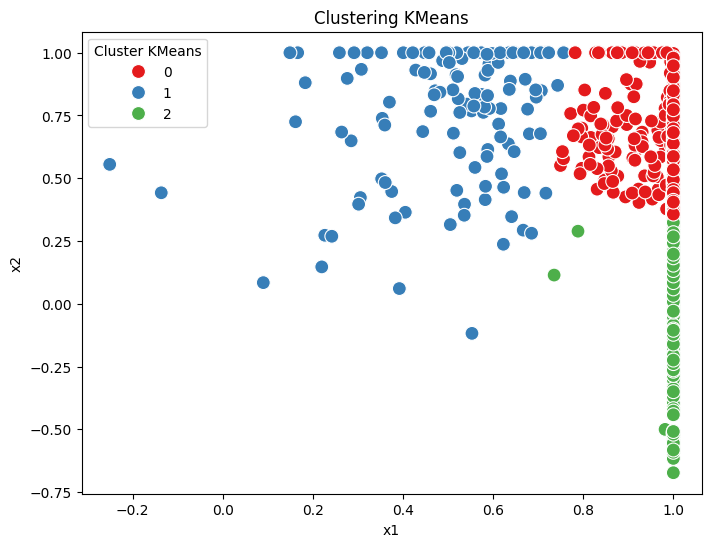

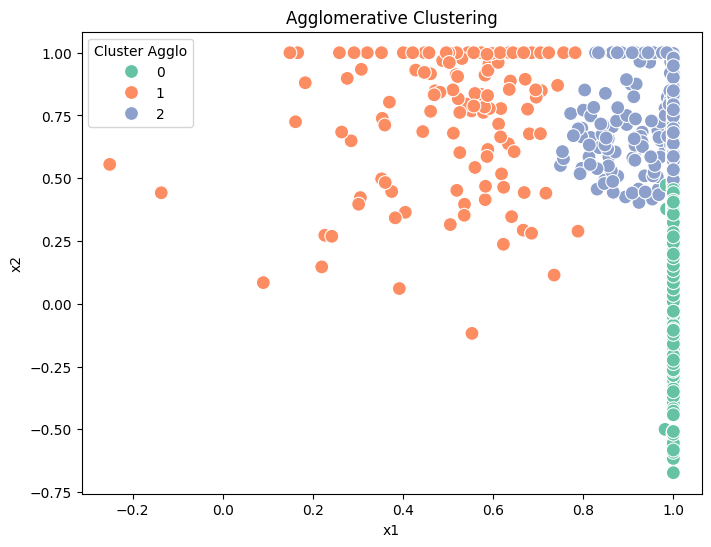

In [41]:
#Clustering dengan KMeans
k_optimal = 3

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels_kmeans = kmeans.fit_predict(scaled_features)
# Tambahkan hasil clustering ke dataframe asli (gunakan kolom dari dataset asli atau numeric_df)
numeric_df['Cluster_KMeans'] = labels_kmeans

# Visualisasi hasil clustering KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features.iloc[:, 0], y=features.iloc[:, 1],
                hue=labels_kmeans, palette='Set1', s=100)
plt.title("Clustering KMeans")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(title="Cluster KMeans")
plt.show()

# Clustering dengan Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=k_optimal)
labels_agglo = agglo.fit_predict(scaled_features)
numeric_df['Cluster_Agglo'] = labels_agglo

# Visualisasi hasil Agglomerative Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features.iloc[:, 0], y=features.iloc[:, 1],
                hue=labels_agglo, palette='Set2', s=100)
plt.title("Agglomerative Clustering")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(title="Cluster Agglo")
plt.show()

#3. Menghitung Matriks Cluster


## Elbow Methode

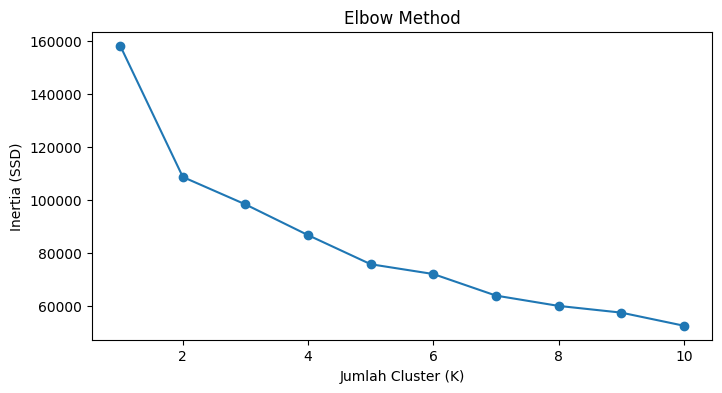

In [42]:
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia (SSD)")
plt.title("Elbow Method")
plt.show()

## Silhouette Coefficient

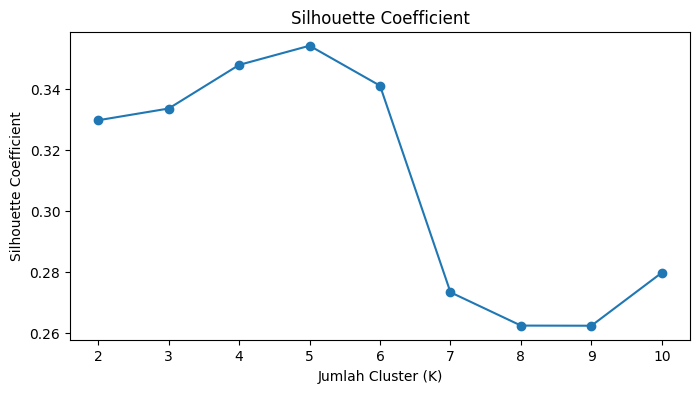

In [43]:
silhouette_vals = []

# Menghitung silhouette coefficient untuk K dari 2 sampai 10
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(data_scaled)

    # Fungsi silhouette_score dari sklearn.metrics dipanggil di sini
    score = silhouette_score(data_scaled, labels)
    silhouette_vals.append(score)

# Visualisasi Silhouette Coefficient
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_vals, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient")
plt.show()

##Calinski-Harabasz Index

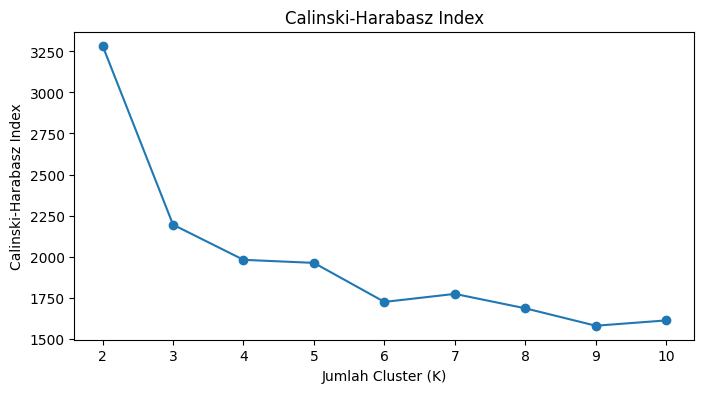

In [33]:
calinski_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(data_scaled)

    ch_score = calinski_harabasz_score(data_scaled, labels)
    calinski_scores.append(ch_score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), calinski_scores, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Index")
plt.show()

##Dunn Index

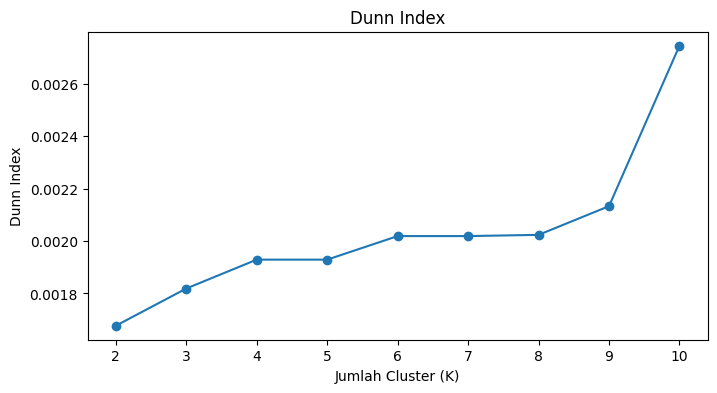

In [35]:
dunn_scores = []

# Fungsi untuk menghitung Dunn Index
def dunn_index(points, labels):
    unique_clusters = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_distances = []

    # Hitung jarak maksimum antar titik dalam tiap cluster (intra-cluster)
    for i in unique_clusters:
        cluster_i = points[labels == i]
        if len(cluster_i) > 1:
            intra_distance = np.max(pdist(cluster_i))
            intra_cluster_distances.append(intra_distance)
        else:
            intra_cluster_distances.append(0)

        # Hitung jarak minimum antar cluster i dan j
        for j in unique_clusters:
            if i < j:
                cluster_j = points[labels == j]
                # Menghitung jarak minimum antar semua titik di cluster_i dan cluster_j
                distance_between = np.min(pdist(np.vstack([cluster_i, cluster_j])))
                inter_cluster_distances.append(distance_between)

    # Jika tidak ada intra-cluster distance atau hasil 0, return NaN
    if len(intra_cluster_distances) == 0 or np.max(intra_cluster_distances) == 0:
        return np.nan
    else:
        return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)


for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(data_scaled)

    dunn = dunn_index(data_scaled, labels)
    dunn_scores.append(dunn)

# Visualisasi Dunn Index
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), dunn_scores, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Dunn Index")
plt.title("Dunn Index")
plt.show()

# Evaluasi Clustering

Berikut adalah beberapa persamaan evaluasi clustering yang digunakan:



## 1. Elbow Methode (SSE)
 Elbow method menghitung nilai inertia untuk berbagai jumlah cluster. Inertia adalah jumlah kuadrat jarak Euclidean antara setiap titik dengan pusat cluster-nya.

Fungsi objektif dalam KMeans didefinisikan sebagai:

$$
\text{Inertia} = \sum_{k=1}^{K} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
$$

- $(K)$ : jumlah cluster  
- $(C_k)$ : himpunan titik pada cluster ke-\(k\)  
- $(\mu_k)$ : pusat (mean) dari cluster ke-\(k\)

Titik "elbow" yang ditunjukkan pada grafik menunjukkan jumlah cluster yang optimal.

---

## 2. Silhouette Coefficient

Silhouette coefficient mengukur seberapa mirip setiap titik dengan cluster-nya dibandingkan dengan cluster lain. Untuk setiap data $(i)$:

$$
s(i) = \frac{b(i) - a(i)}{\max \{ a(i), b(i) \}}
$$


- **$a(i)$**: jarak rata-rata dari titik $i$ ke semua titik lain dalam cluster yang sama (intra-cluster distance),  
- **$b(i)$**: jarak rata-rata dari titik $i$ ke semua titik pada cluster terdekat yang berbeda (nearest-cluster distance).

Nilai $s(i)$ berkisar dari -1 (cluster yang tidak sesuai) hingga +1 (cluster yang sangat kompak).

Nilai rata-rata silhouette mendekati 1 menunjukkan pemisahan cluster yang baik.

Kelebihan: mudah diinterpretasi dan memberikan insight per titik.

---

## 3. Calinski-Harabasz Index

Indeks ini mengukur seberapa baik cluster yang terbentuk dengan menghitung rasio variansi antar cluster terhadap variansi dalam cluster:

$$
CH = \frac{\text{Between-Cluster Dispersion}}{\text{Within-Cluster Dispersion}} \times \frac{N - k}{k - 1}
$$

- **$N$**: jumlah total data,  
- **$k$**: jumlah cluster,  
- **Between-Cluster Dispersion**: mengukur jarak antar centroid cluster,  
- **Within-Cluster Dispersion**: mengukur jarak antara titik data dengan centroid cluster masing-masing.

Nilai yang lebih tinggi menunjukkan cluster yang lebih terpisah.

---

## 4. Dunn Index

Dunn Index mendefinisikan kualitas clustering dengan mengambil rasio antara jarak antar cluster minimum dan diameter maksimal di antara setiap cluster:

$$
\text{Dunn} = \frac{\min_{i \neq j} \; \delta(C_i,C_j)}{\max_{1 \leq k \leq K} \; \Delta(C_k)}
$$

- **$\delta(C_i,C_j)$**: jarak minimum antara tiap titik dari cluster $C_i$ dengan tiap titik dari cluster $C_j$,  
- **$\Delta(C_k)$**: diameter cluster $C_k$, yakni jarak maksimum antara dua titik dalam cluster yang sama.

Nilai Dunn Index yang besar menandakan adanya pemisahan antar cluster yang baik dan cluster yang kompak.

---

Metriks Terbaik:
- Elbow Method membantu menentukan jumlah cluster dengan menganalisis perubahan inertia, namun kurang eksplisit dalam memberi batasan untuk cluster yang “baik”.

- Silhouette Coefficient sangat populer karena mengkombinasikan informasi intra- dan inter-cluster serta mudah diinterpretasi.

- Calinski-Harabasz Index juga banyak digunakan karena sederhana dan cepat.

- Dunn Index memberikan gambaran yang sangat jelas mengenai pemisahan dan kompaksi cluster, tetapi terkadang sulit untuk dihitung pada dataset besar.

Dalam praktiknya, Silhouette Coefficient sering dijadikan patokan karena memberikan nilai yang relatif mudah dipahami, sementara Calinski-Harabasz Index bisa dipakai sebagai konfirmasi tambahan.

